**开始**

In [81]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**获取数据** 这里已经下载了数据集

In [82]:
import os
import tarfile
import urllib.request
from pandas import DataFrame
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("housing",'housing.csv')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def load_housing_data(path=HOUSING_PATH) -> DataFrame:
    return pd.read_csv(path)

**查看数据结构信息**

In [83]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [86]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


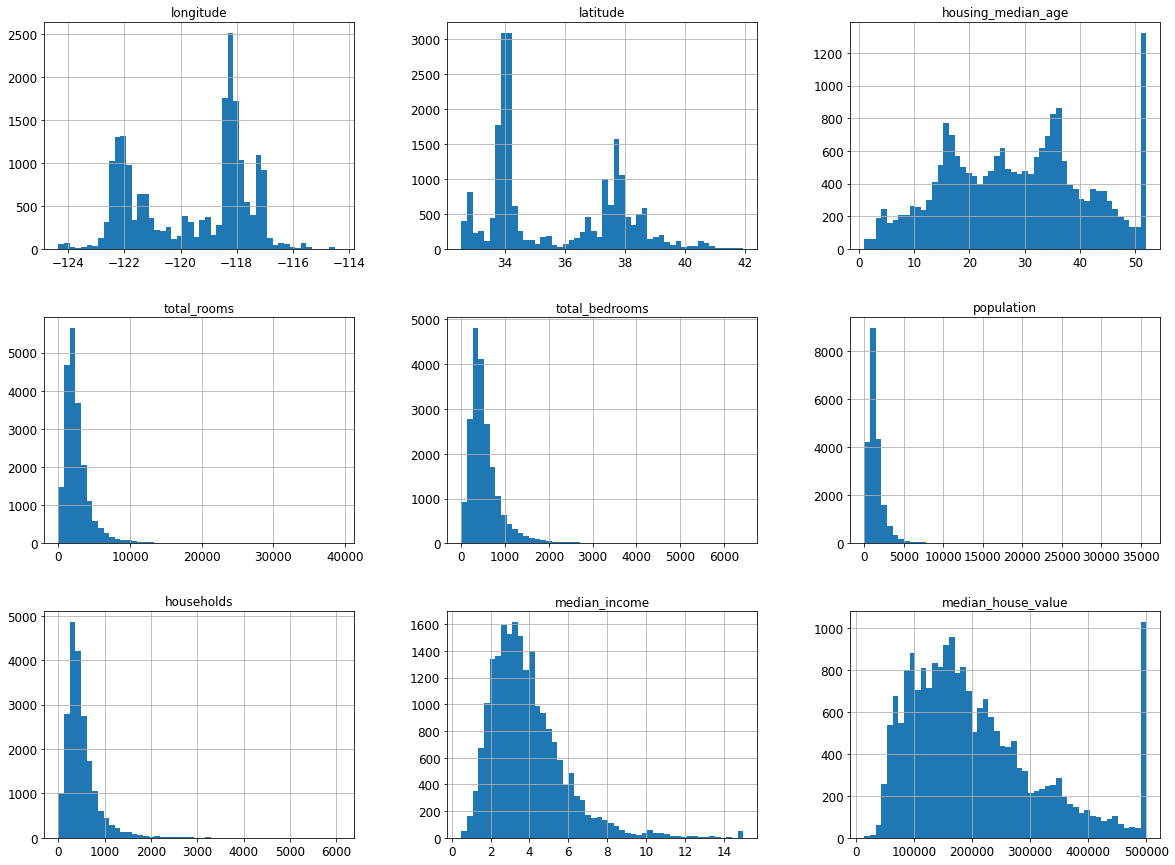

In [87]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

**创建测试集合**

In [88]:
import numpy as np
from pandas import DataFrame
from numpy import ndarray


np.random.seed(42)
def get_shuffled_indexs(data_length:int)->ndarray:
    return np.random.permutation(data_length)
get_shuffled_indexs(100)

array([83, 53, 70, 45, 44, 39, 22, 80, 10,  0, 18, 30, 73, 33, 90,  4, 76,
       77, 12, 31, 55, 88, 26, 42, 69, 15, 40, 96,  9, 72, 11, 47, 85, 28,
       93,  5, 66, 65, 35, 16, 49, 34,  7, 95, 27, 19, 81, 25, 62, 13, 24,
        3, 17, 38,  8, 78,  6, 64, 36, 89, 56, 99, 54, 43, 50, 67, 46, 68,
       61, 97, 79, 41, 58, 48, 98, 57, 75, 32, 94, 59, 63, 84, 37, 29,  1,
       52, 21,  2, 23, 87, 91, 74, 86, 82, 20, 60, 71, 14, 92, 51])

In [89]:
def split_train_test(data:DataFrame,test_ratio:float)->(DataFrame,DataFrame):
    shuffled_indices=get_shuffled_indexs(len(data))
    test_size=int(len(data)*test_ratio)
    test_indexs=shuffled_indices[:test_size]
    train_index=shuffled_indices[test_size:]
    return data.iloc[train_index],data.iloc[test_indexs]

In [90]:
train_set,test_set=split_train_test(housing,0.2)
train_set.shape
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1944,-120.95,38.79,12.0,3247.0,579.0,1459.0,517.0,4.3981,202800.0,INLAND
17367,-120.42,34.94,32.0,2844.0,551.0,1337.0,516.0,2.7188,133700.0,<1H OCEAN
17976,-121.97,37.31,21.0,7628.0,2166.0,3637.0,1749.0,3.6401,267500.0,<1H OCEAN
12436,-116.17,33.67,18.0,3585.0,800.0,3873.0,788.0,2.5714,65900.0,INLAND
11491,-117.99,33.70,13.0,4013.0,903.0,1999.0,859.0,4.6250,248800.0,<1H OCEAN


In [91]:
test_set.shape

(4128, 10)

**哈希运算计算出crc后进行分离**

In [92]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [93]:
housing_width_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_width_id,0.2,'index')
train_set.shape,test_set.shape

((16512, 11), (4128, 11))

**新建一个id数据也可以**

In [94]:
# housing_width_id=housing.reset_index()
# housing['id']=housing['longitude']*1000+housing['latitude']
# train_set,test_set=split_train_test_by_id(housing,0.2,'id')
# train_set.shape,test_set.shape

In [95]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY


**scikit自带的分离工具**

In [96]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
train_set.shape,test_set.shape

((16512, 10), (4128, 10))

In [97]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


<AxesSubplot:>

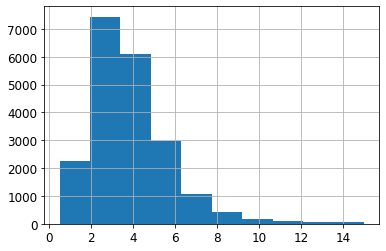

In [98]:
housing['median_income'].hist()

In [99]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels=[1, 2, 3, 4, 5])
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

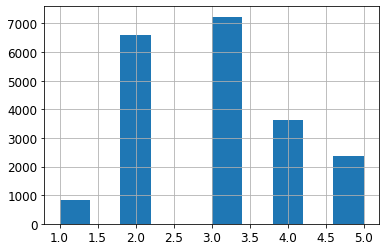

In [100]:
housing["income_cat"].hist()

**策略分组**

In [101]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_inex in split.split(housing,housing['income_cat']):
    start_train_set=housing.iloc[train_index]
    strat_test_set=housing.iloc[test_inex]
start_train_set['income_cat'].value_counts(),strat_test_set['income_cat'].value_counts()

(3    5789
 2    5265
 4    2911
 5    1890
 1     657
 Name: income_cat, dtype: int64,
 3    1447
 2    1316
 4     728
 5     472
 1     165
 Name: income_cat, dtype: int64)

In [102]:
from pandas import Series
def income_cat_proportions(data:DataFrame)->Series:
    ret=data["income_cat"].value_counts() / len(data)
#     print(type(ret))
    return ret
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
    

In [103]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [104]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [105]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,3
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,3
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,3
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,2
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,3


In [106]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND,2
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND,2
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3


In [107]:
def income_rpoportions(data:DataFrame):
    return data['income_cat'].value_counts()/len(data)

train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)


compare_props=pd.DataFrame({
    'OverAll':income_cat_proportions(housing),
    'Stratified':income_cat_proportions(strat_test_set),
    'Random':income_cat_proportions(test_set)
}).sort_index()
compare_props['Rand .%error']=(compare_props['Random']/compare_props['OverAll']-1)*100
compare_props['Strate. %error']=(compare_props['Stratified']/compare_props['OverAll']-1)*100

In [108]:
compare_props

,OverAll,Stratified,Random,Rand .%error,Strate. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


**删除income_cat列**

In [109]:
for set_ in (strat_test_set,start_train_set):
    set_.drop('income_cat',axis=1,inplace=True)

D:\Programs\Anaconda\envs\ml2\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**从图表中发现数据规律**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

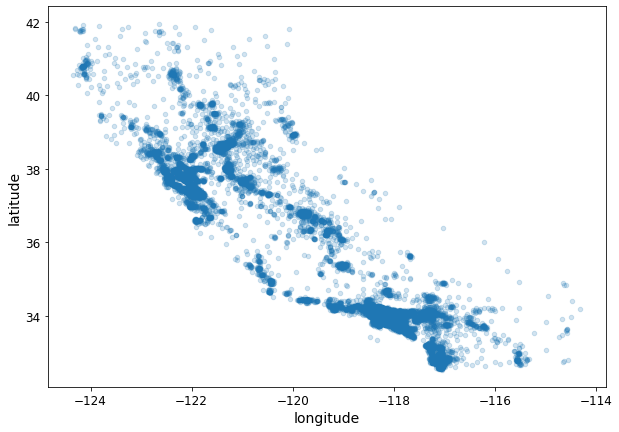

In [110]:
housing=start_train_set.copy()
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2, figsize=(10,7))

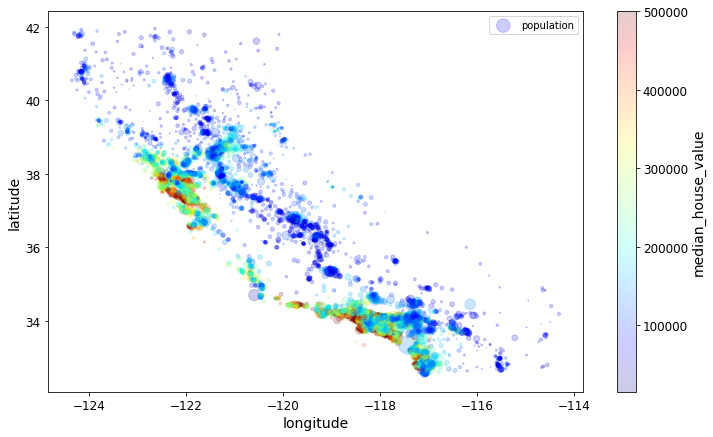

In [111]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,
             s=housing['population']/100,label='population', figsize=(12,7),c='median_house_value',
            cmap=plt.get_cmap('jet'),colorbar=True,sharex=False)
plt.legend()

# 显示图片
colorbar=False不显示colorbar

['$15', '$63', '$112', '$160', '$209', '$258', '$306', '$355', '$403', '$452', '$500']


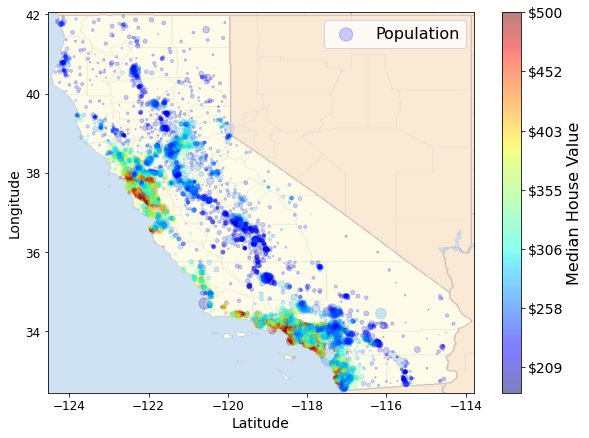

In [112]:
import matplotlib.image as mpimg
california=mpimg.imread('./images/end_to_end_project/california.png')
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,
             s=housing['population']/100,label='Population', figsize=(10,7),
             c='median_house_value',cmap=plt.get_cmap('jet'),
             colorbar=False)
plt.imshow(california,extent=[-124.55,-113.80,32.45,42.05],alpha=0.5,cmap=plt.get_cmap('jet'))
plt.xlabel('Latitude')
plt.ylabel('Longitude')

prices=housing['median_house_value']
tick_values=np.linspace(prices.min(),prices.max(),11)
cbar=plt.colorbar(ticks=tick_values/prices.max())
ytick=['$%d'%(round(v/1000)) for v in tick_values]
print(ytick)
cbar.ax.set_yticklabels(ytick,fontsize=14)
cbar.set_label('Median House Value',fontsize=16)

plt.legend(fontsize=16)
plt.show()

# 查找数据规律

In [113]:
corr_matrix=housing.corr()

In [114]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

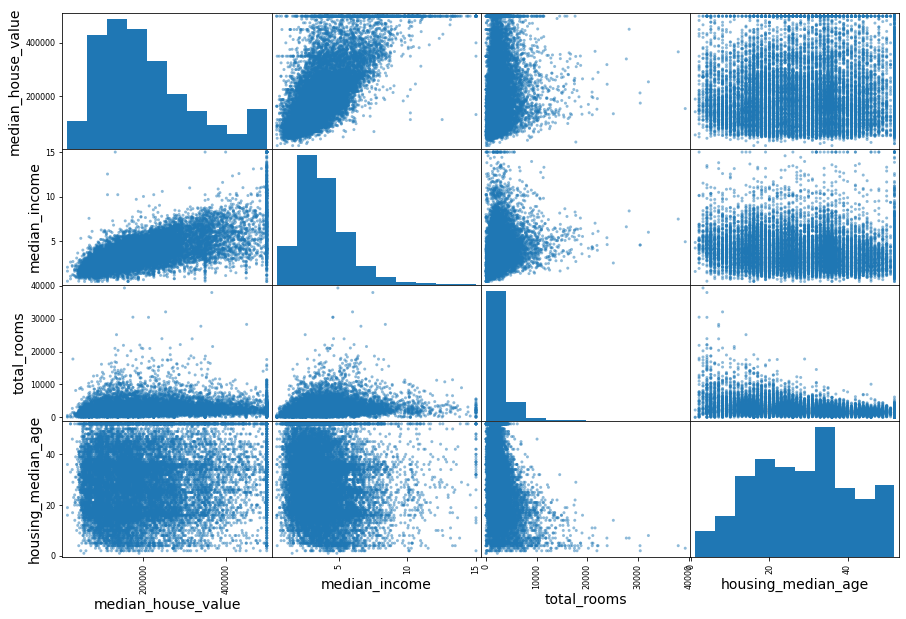

In [115]:
# To plot pretty figures
%matplotlib inline
from pandas.plotting import scatter_matrix
housing_copy=housing.copy()
attrs=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attrs],figsize=(15,10))
plt.show()

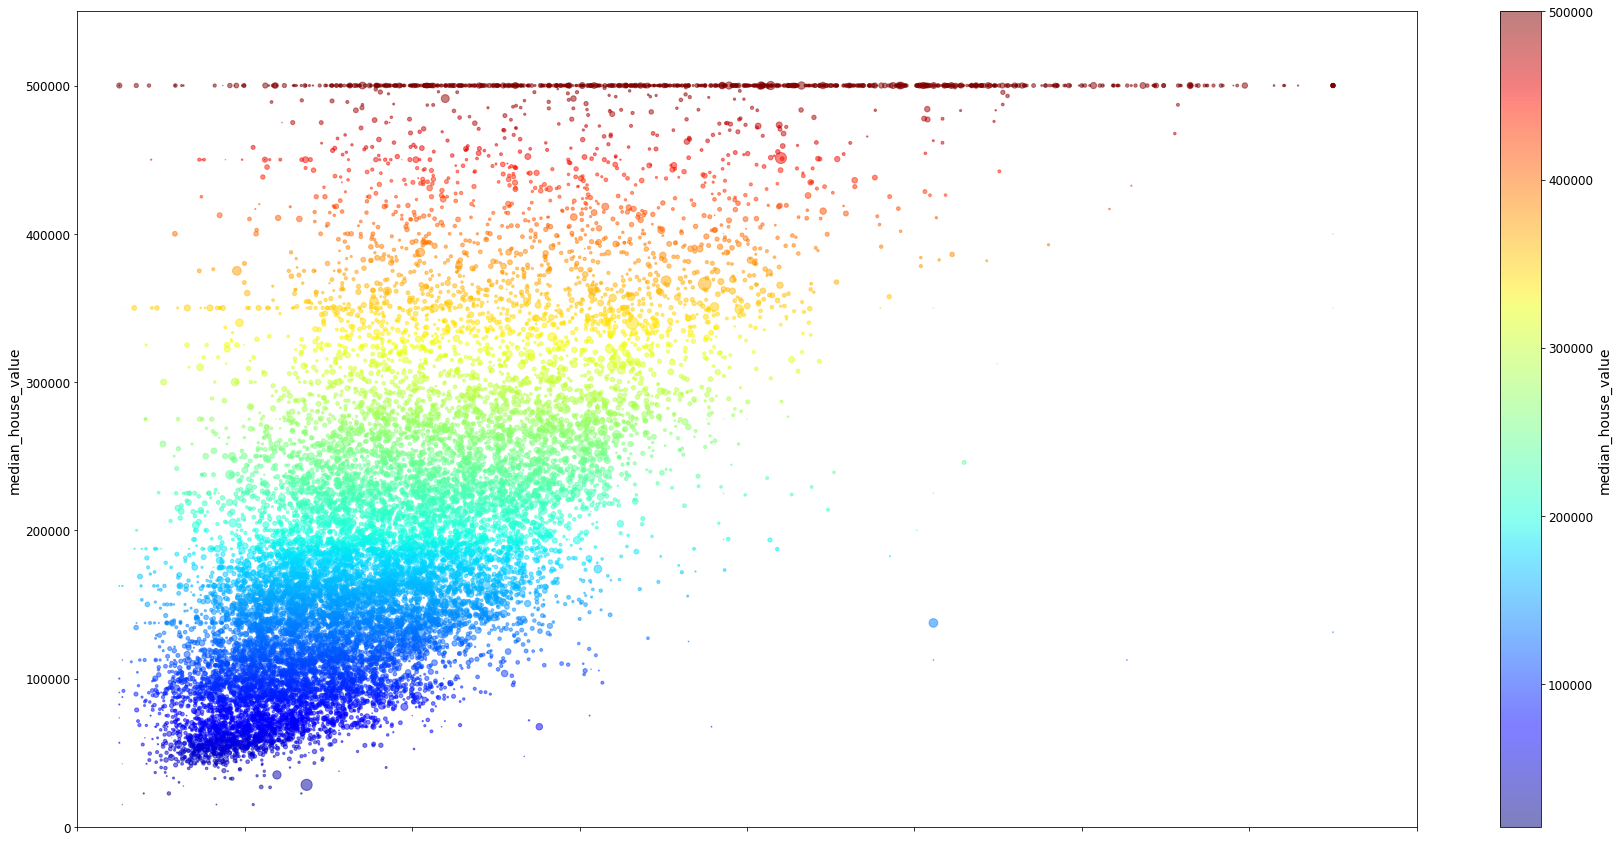

In [116]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.5,c='median_house_value',s=housing['population']/100,cmap=plt.get_cmap('jet'),
             colorbar=True,figsize=(30,15))
plt.axis([0,16,0,550000])
plt.show()

In [117]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


# 查看组合数据的特征

In [118]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [119]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [120]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 准备开始机器学习的数据

In [121]:
housing=start_train_set.drop('median_house_value',axis=1)
housing_label=start_train_set['median_house_value'].copy()

In [122]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [123]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


# 空值处理

In [124]:
#删除所有含有空白值的行
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [125]:
#删除含有空白值的列
sample_incomplete_rows.drop('total_bedrooms',axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN


In [126]:
#使用中值填充
media=housing['total_bedrooms'].median()
sample_incomplete_rows['total_bedrooms'].fillna(media,inplace=True)

D:\Programs\Anaconda\envs\ml2\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [127]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,NEAR OCEAN


**使用sklearn自带填充方法**

In [128]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
housing_num=housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [129]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [130]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [131]:
X=imputer.transform(housing_num)

In [132]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing.index)

In [133]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


# 处理标签为非数字

In [134]:
housing_cat=housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [135]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_endcoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_endcoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [136]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [137]:
from sklearn.preprocessing import OneHotEncoder

cat_encode=OneHotEncoder()
housing_cat_1hot=cat_encode.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [138]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

**直接生成数组,不需要toarray()方法**

In [139]:
cat_encode=OneHotEncoder(sparse=False)
housing_cat_1hot=cat_encode.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 创建一个数据转换器

In [140]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [142]:
corr_matrix=housing_copy.corr()
corr_sort=corr_matrix['median_house_value'].sort_values(ascending=False)
corr_sort

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [145]:
corr_sort[1:4]
type(corr_sort)

pandas.core.series.Series

In [146]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms=True): # no *args or **kargs
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
class FilterMostImportaneAttributes(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X:DataFrame):
        return np.c_[X['median_income'],X['total_rooms']]
    

attr_adder=CombinedAttributesAdder(add_bedrooms_per_rooms=False)
housing_extra_attribs=attr_adder.transform(housing.values)
housing_extra_attribs[:5]

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 2.223333333333333],
       [-117.13, 32.75, 24.0, 1877.0, 519.0, 898.0, 483.0, 2.2264,
        'NEAR OCEAN', 3.886128364389234, 1.8592132505175984],
       [-118.7, 34.28, 27.0, 3536.0, 646.0, 1837.0, 580.0, 4.4964,
        '<1H OCEAN', 6.096551724137931, 3.1672413793103447]], dtype=object)

**另一种生成序列号的方法**

In [147]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices
rooms_ix,bedrooms_ix,population_ix,households_ix

(3, 4, 5, 6)

In [148]:
# print(housing.columns)
housing_extra_attribs=DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+['room_per_household','population_per_household'],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,room_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


# 创建 Pipelines

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')), #数据填充
    ('attribs_adder',FilterMostImportaneAttributes()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [66]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [67]:
from sklearn.compose import ColumnTransformer

num_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

housing_prepared=full_pipeline.fit_transform(housing)

In [68]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [69]:
housing_prepared.shape

(16512, 16)

# 选择一个训练模型

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_label)

LinearRegression()

In [71]:
some_data=housing.iloc[:5]
some_labels=housing_label.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
predict=lin_reg.predict(some_data_prepared)
# pd.concat([DataFrame(predict,columns=['predict']),DataFrame(some_labels)],axis=1)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [72]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [73]:
from sklearn.metrics import mean_squared_error
def algorithm_imp(regressor):
    regressor.fit(housing_prepared,housing_label)
    predicitions=regressor.predict(some_data_prepared)
    mse=mean_squared_error(some_labels,predicitions)
    print('labels:',some_labels.values)
    print('predictions:',predicitions)
    return np.sqrt(mse)

# 线性回归

In [74]:
from sklearn.linear_model import LinearRegression
algorithm_imp(LinearRegression())

# housing_predictions=lin_reg.predict(housing_prepared)
# lin_mse=mean_squared_error(housing_label,housing_predictions)
# np.sqrt(lin_mse)

labels: [ 72100. 279600.  82700. 112500. 238300.]
predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


47159.2238740671

# 回归树算法

In [75]:
from sklearn.tree import DecisionTreeRegressor
algorithm_imp(DecisionTreeRegressor(random_state=42))

labels: [ 72100. 279600.  82700. 112500. 238300.]
predictions: [ 72100. 279600.  82700. 112500. 238300.]


0.0

# 使用交叉验证更好的进行评估

In [76]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(DecisionTreeRegressor(random_state=42),housing_prepared,housing_label,
                      scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [77]:
def display_scores(scores:ndarray):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

In [78]:
display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [79]:
from sklearn.ensemble import RandomForestRegressor

algorithm_imp(RandomForestRegressor(n_estimators=100,random_state=42))

labels: [ 72100. 279600.  82700. 112500. 238300.]
predictions: [ 75324.   302650.01  82760.   123227.   228762.  ]


12229.004129528295

In [80]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), housing_prepared, housing_label,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

KeyboardInterrupt: 

# SVR模型

In [ ]:
from sklearn.svm import SVR

algorithm_imp(SVR(kernel='linear'))

# 网格搜索 耗时较长！！！

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_label)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
DataFrame(grid_search.cv_results_)